In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
data = pd.read_csv("Cleaned_bike_data.csv")

In [3]:
data.head()

,Model,Year,Brand,Kms_driven,Price
0,Honda Activa 5G,2018,Honda,11500,15000.0
1,Bajaj Dominar 400,2019,Bajaj,21863,155000.0
2,Royal Enfield Classic 500,2018,Royal Enfield,39000,158000.0
3,Royal Enfield Classic 500,2018,Royal Enfield,39000,150000.0
4,TVS Ntorq 125,2020,TVS,5300,31500.0


## Exploratory Data Analysis

Getting insights about the dataset

In [4]:
data.shape

(1056, 5)

In [5]:
#the columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Model       1056 non-null   object 
 1   Year        1056 non-null   int64  
 2   Brand       1056 non-null   object 
 3   Kms_driven  1056 non-null   int64  
 4   Price       1045 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 41.4+ KB


In [6]:
#quick summary of the dataset
data.describe()

,Year,Kms_driven,Price
count,1056.000000,1056.000000,1.045000e+03
mean,2016.340909,24832.904356,8.879740e+04
std,4.049372,41306.513345,8.495054e+04
min,1995.000000,0.000000,7.000000e+03
25%,2014.000000,9000.000000,4.000000e+04
50%,2017.000000,19550.000000,7.000000e+04
75%,2019.000000,32000.000000,1.150000e+05
max,2022.000000,962720.000000,1.599999e+06


In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
#checking for null values
data.isnull().sum()

Model          0
Year           0
Brand          0
Kms_driven     0
Price         11
dtype: int64

**There are few missing values in the Price column**


We will fix the missing values with median imputation

In [9]:
data['Price'] = data['Price'].fillna(data['Price'].median())

In [10]:
data.isnull().sum()

Model         0
Year          0
Brand         0
Kms_driven    0
Price         0
dtype: int64

In [11]:
#Having an idea of the brands of the car
data.Brand.unique()

array(['Honda', 'Bajaj', 'Royal Enfield', 'TVS', 'Hero', 'Harley',
       'Yamaha', 'Suzuki', 'KTM', 'Mahindra', 'LML', 'YO Bikes', 'Jawa',
       'Ather', 'BMW', 'Yezdi', 'Indian', 'Aprilia', 'UM', 'Hyosung',
       'Benelli', 'Kawasaki'], dtype=object)

In [12]:
data.Brand.nunique()

22

**There are total 22 unique brands of car in the dataset**

In [13]:
data.Model.nunique()

176

**Total 176 models are persent in the dataset. 'Model' is a categorical variable. We will check how 'Model' affects our target variable i.e., 'Price' and accordingly we will perform some encoding technique to convert them into numeric form.**

In [14]:
#Checking for maximum distance driven
data.Kms_driven.max()

962720

In [15]:
data.loc[data['Kms_driven'] == 962720]

,Model,Year,Brand,Kms_driven,Price
770,Honda Activa,2014,Honda,962720,35000.000


In [16]:
data.describe()

,Year,Kms_driven,Price
count,1056.000,1056.000,1056.000
mean,2016.341,24832.904,88601.592
std,4.049,41306.513,84528.079
min,1995.000,0.000,7000.000
25%,2014.000,9000.000,40000.000
50%,2017.000,19550.000,70000.000
75%,2019.000,32000.000,115000.000
max,2022.000,962720.000,1599999.000


In [17]:
data.loc[data['Price'] == 1599999.000]

,Model,Year,Brand,Kms_driven,Price
748,Harley Davidson Street Glide,2016,Harley,43000,1599999.000


**Let us plot histogram to get an idea of the distribution of the continuous variables**

<AxesSubplot: xlabel='Price', ylabel='Count'>

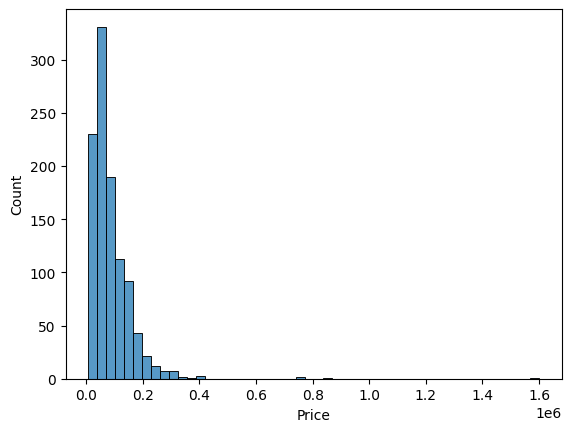

In [18]:
sns.histplot(data['Price'],bins=50)

<AxesSubplot: xlabel='Kms_driven', ylabel='Count'>

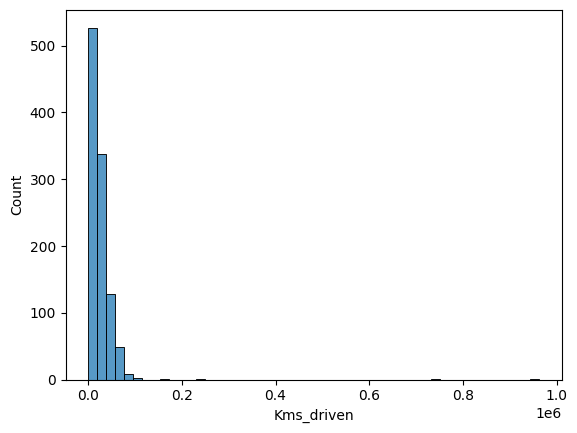

In [19]:
sns.histplot(data['Kms_driven'],bins=50)

((array([-3.21326575, -2.94925095, -2.80199685, ...,  2.80199685,
          2.94925095,  3.21326575]),
  array([   7000.,   10000.,   12000., ...,  740000.,  850000., 1599999.])),
 (64611.41656827169, 88601.59185606061, 0.762714367556189))

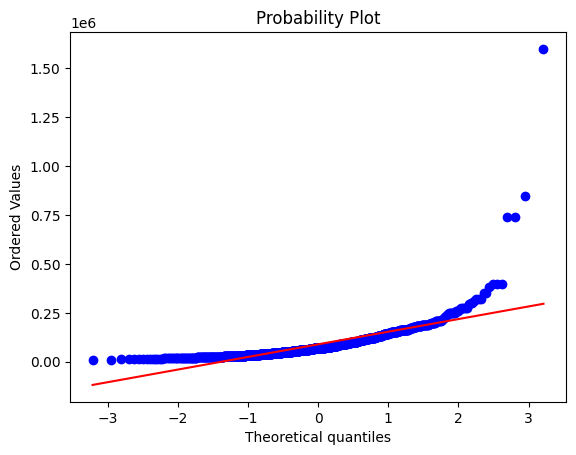

In [20]:
# Checking whether data is normally distributed
import scipy.stats as stats
import pylab
stats.probplot(data['Price'], dist = "norm", plot = pylab)

((array([-3.21326575, -2.94925095, -2.80199685, ...,  2.80199685,
          2.94925095,  3.21326575]),
  array([     0,      0,      0, ..., 241095, 736255, 962720], dtype=int64)),
 (22726.53457214336, 24832.904356060608, 0.5489949454194479))

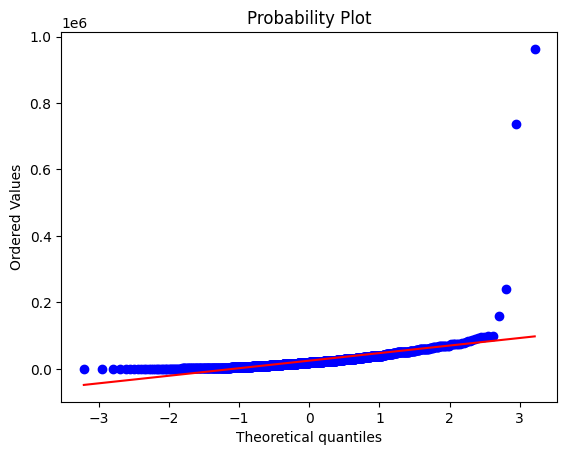

In [21]:
stats.probplot(data['Kms_driven'], dist = "norm", plot = pylab)

We can observe that the data is not normally distributed and is quite skewed to the right. We will apply some transformation to make the data normally distributed.

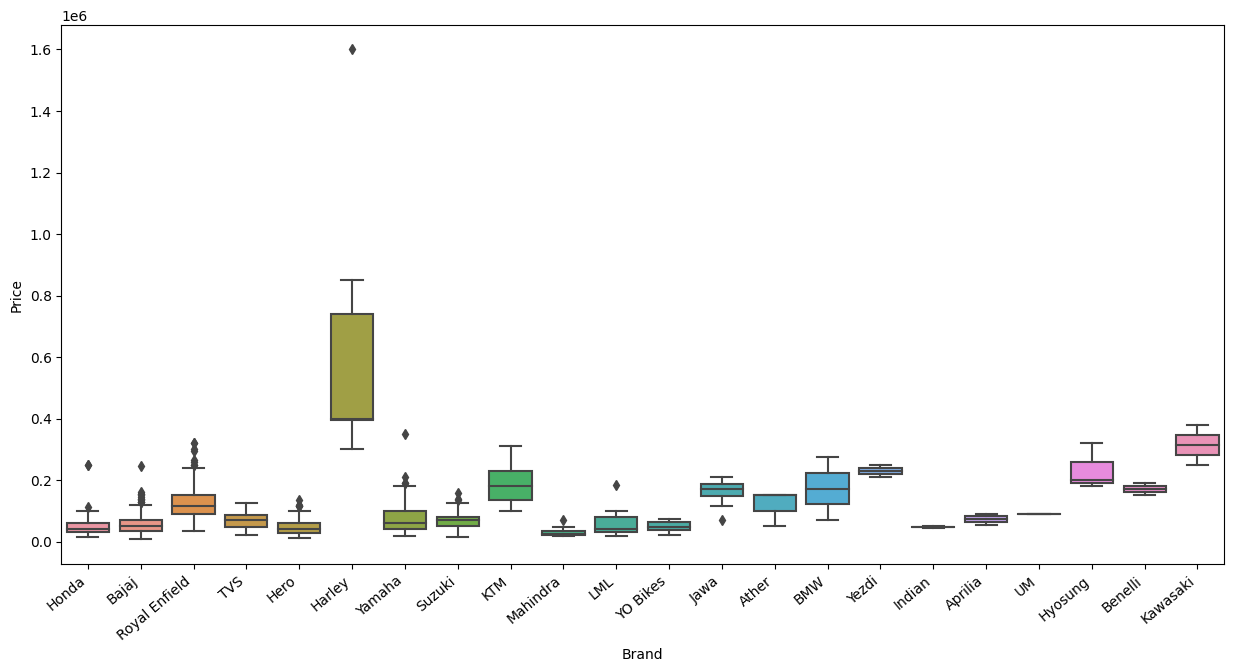

In [22]:
#Checking relationship of Brand with Price
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Brand',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

From the boxplot, we can observe that few brand like Royal Enfield, Harley have high prices, which makes sense.  

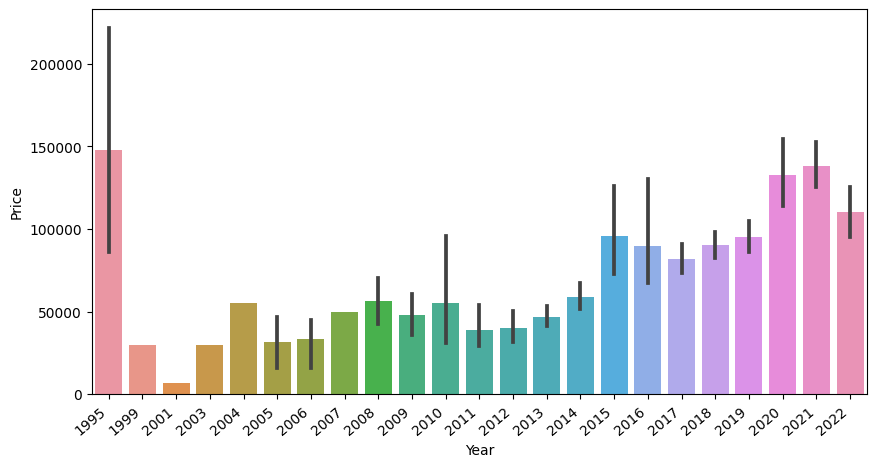

In [23]:
#Checking relationship of Year with Price
plt.subplots(figsize=(10,5))
ax=sns.barplot(x='Year',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

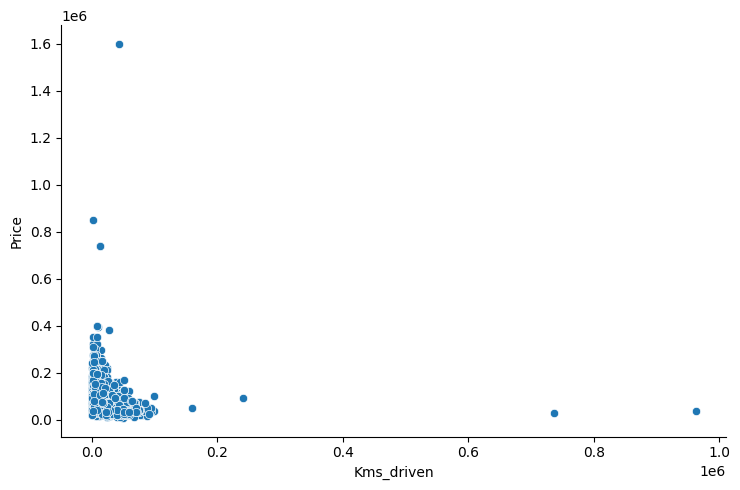

In [24]:
#Checking relationship of kms_driven with Price
sns.relplot(x='Kms_driven',y='Price',data=data,height=5,aspect=1.5)

When we buy second hand vehicles, we definetly check for how much distance it is driven. The lesser the distance, the more the price. From the graph as well, we can see the price is higher for less driven bikes.

Boxplot to check the presence of outliers

<AxesSubplot: >

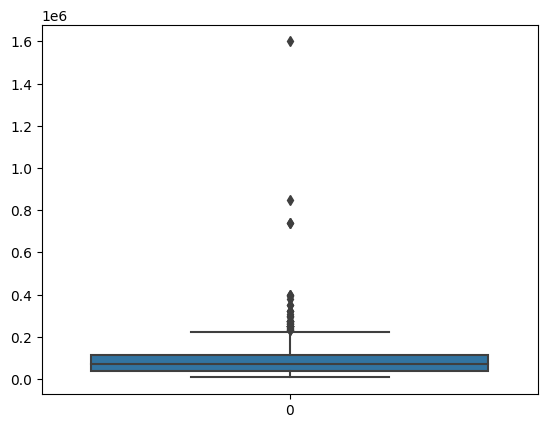

In [25]:
sns.boxplot(data["Price"])

<AxesSubplot: >

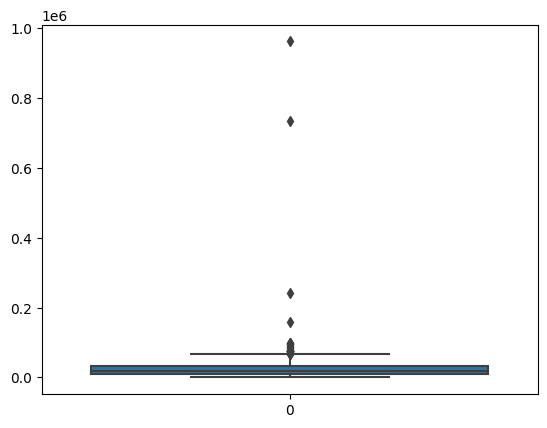

In [26]:
sns.boxplot(data["Kms_driven"])

As we can see there are outliers in the Price and Kms_driven column, so to fix it we will apply Winsorisation technique.

In [27]:
IQR_price = data['Price'].quantile(0.75) - data['Price'].quantile(0.25)
lower_limit_price = data['Price'].quantile(0.25) - (IQR_price * 1.5)
upper_limit_price = data['Price'].quantile(0.75) + (IQR_price * 1.5)

In [28]:
print(lower_limit_price)
print(upper_limit_price)

-72500.0
227500.0


In [29]:
IQR_kms = data['Kms_driven'].quantile(0.75) - data['Price'].quantile(0.25)
lower_limit_kms = data['Kms_driven'].quantile(0.25) - (IQR_kms * 1.5)
upper_limit_kms = data['Kms_driven'].quantile(0.75) + (IQR_kms * 1.5)

In [30]:
print(lower_limit_kms)
print(upper_limit_kms)

21000.0
20000.0


In [31]:
from datetime import date
todays_date = date.today()
todays_date.year

2022

In [32]:
data['Years_used']=todays_date.year - data['Year']

In [33]:
data.drop(['Year'],axis=1,inplace=True)

In [34]:
data.head()

,Model,Brand,Kms_driven,Price,Years_used
0,Honda Activa 5G,Honda,11500,15000.000,4
1,Bajaj Dominar 400,Bajaj,21863,155000.000,3
2,Royal Enfield Classic 500,Royal Enfield,39000,158000.000,4
3,Royal Enfield Classic 500,Royal Enfield,39000,150000.000,4
4,TVS Ntorq 125,TVS,5300,31500.000,2


C:\Users\excep\AppData\Local\Temp\ipykernel_22404\3385634631.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")


<AxesSubplot: >

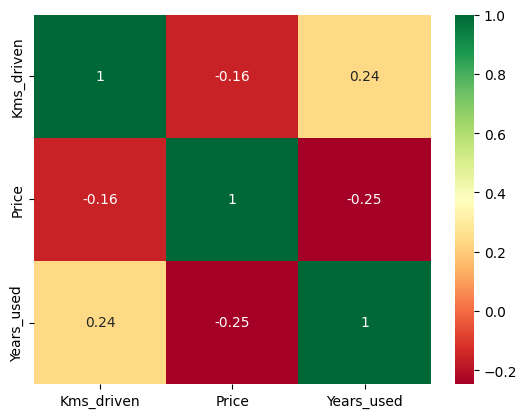

In [35]:
#checking the correlation between features
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [36]:
#checking for duplicate rows
data.duplicated(subset=['Model', 'Years_used', 'Brand', 'Kms_driven']).sum()

128

In [37]:
#droping duplicates
data.drop_duplicates(subset=['Model', 'Years_used', 'Brand', 'Kms_driven'],keep='first', inplace=True, ignore_index=True)

In [38]:
data.loc[data['Kms_driven']==0]

,Model,Brand,Kms_driven,Price,Years_used
114,YO Bikes Yo Smart,YO Bikes,0,56000.000,0
213,Ather Energy Ather 450,Ather,0,50000.000,0
429,Aprilia SRV 850 ABS,Aprilia,0,68000.000,0
876,Bajaj Pulsar 200 NS,Bajaj,0,42000.000,9


In [39]:
data.at[114,'Kms_driven']= data.Kms_driven.median()
data.at[213,'Kms_driven']= data.Kms_driven.median()
data.at[429,'Kms_driven']= data.Kms_driven.median()
data.at[876,'Kms_driven']= data.Kms_driven.median()

In [40]:
data.head()

,Model,Brand,Kms_driven,Price,Years_used
0,Honda Activa 5G,Honda,11500.000,15000.000,4
1,Bajaj Dominar 400,Bajaj,21863.000,155000.000,3
2,Royal Enfield Classic 500,Royal Enfield,39000.000,158000.000,4
3,TVS Ntorq 125,TVS,5300.000,31500.000,2
4,Hero Xpulse 200,Hero,400.000,135000.000,0


In [41]:
X=data[['Model','Brand','Kms_driven','Years_used']]
y=data[['Price']]


In [42]:
X.shape

(928, 4)

In [43]:
y.shape

(928, 1)

### Applying Transformation to make the data normally distributed

In [44]:
y["Log_Price"] = np.log(y["Price"])

C:\Users\excep\AppData\Local\Temp\ipykernel_22404\249330477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Log_Price"] = np.log(y["Price"])


((array([-3.17598360e+00, -2.90910492e+00, -2.76006552e+00, -2.65489533e+00,
         -2.57281102e+00, -2.50509207e+00, -2.44722040e+00, -2.39654187e+00,
         -2.35135999e+00, -2.31052235e+00, -2.27320918e+00, -2.23881582e+00,
         -2.20688309e+00, -2.17705381e+00, -2.14904443e+00, -2.12262602e+00,
         -2.09761094e+00, -2.07384344e+00, -2.05119276e+00, -2.02954802e+00,
         -2.00881433e+00, -1.98890986e+00, -1.96976353e+00, -1.95131317e+00,
         -1.93350410e+00, -1.91628795e+00, -1.89962173e+00, -1.88346703e+00,
         -1.86778942e+00, -1.85255788e+00, -1.83774439e+00, -1.82332353e+00,
         -1.80927218e+00, -1.79556922e+00, -1.78219536e+00, -1.76913286e+00,
         -1.75636544e+00, -1.74387806e+00, -1.73165684e+00, -1.71968891e+00,
         -1.70796234e+00, -1.69646605e+00, -1.68518969e+00, -1.67412363e+00,
         -1.66325886e+00, -1.65258695e+00, -1.64210001e+00, -1.63179060e+00,
         -1.62165177e+00, -1.61167695e+00, -1.60185996e+00, -1.59219496e+00,

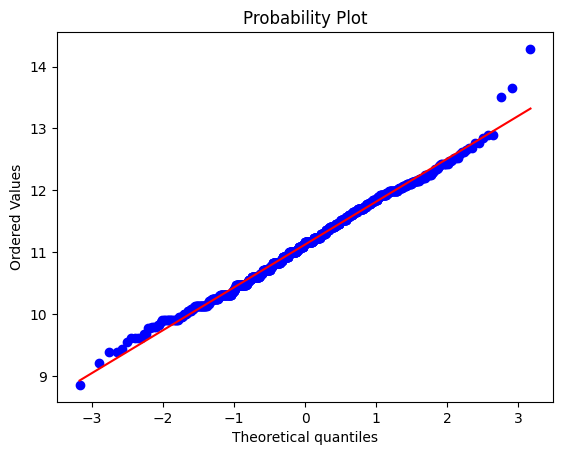

In [45]:
stats.probplot(y['Log_Price'], dist = "norm", plot = pylab)

In [46]:
y.head()

,Price,Log_Price
0,15000.000,9.616
1,155000.000,11.951
2,158000.000,11.970
3,31500.000,10.358
4,135000.000,11.813


In [47]:
y.drop("Price",axis=1,inplace= True)

C:\Users\excep\AppData\Local\Temp\ipykernel_22404\1976966639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop("Price",axis=1,inplace= True)


In [48]:
X["sqrt_Kms_driven"] = np.sqrt(X["Kms_driven"])

((array([-3.17598360e+00, -2.90910492e+00, -2.76006552e+00, -2.65489533e+00,
         -2.57281102e+00, -2.50509207e+00, -2.44722040e+00, -2.39654187e+00,
         -2.35135999e+00, -2.31052235e+00, -2.27320918e+00, -2.23881582e+00,
         -2.20688309e+00, -2.17705381e+00, -2.14904443e+00, -2.12262602e+00,
         -2.09761094e+00, -2.07384344e+00, -2.05119276e+00, -2.02954802e+00,
         -2.00881433e+00, -1.98890986e+00, -1.96976353e+00, -1.95131317e+00,
         -1.93350410e+00, -1.91628795e+00, -1.89962173e+00, -1.88346703e+00,
         -1.86778942e+00, -1.85255788e+00, -1.83774439e+00, -1.82332353e+00,
         -1.80927218e+00, -1.79556922e+00, -1.78219536e+00, -1.76913286e+00,
         -1.75636544e+00, -1.74387806e+00, -1.73165684e+00, -1.71968891e+00,
         -1.70796234e+00, -1.69646605e+00, -1.68518969e+00, -1.67412363e+00,
         -1.66325886e+00, -1.65258695e+00, -1.64210001e+00, -1.63179060e+00,
         -1.62165177e+00, -1.61167695e+00, -1.60185996e+00, -1.59219496e+00,

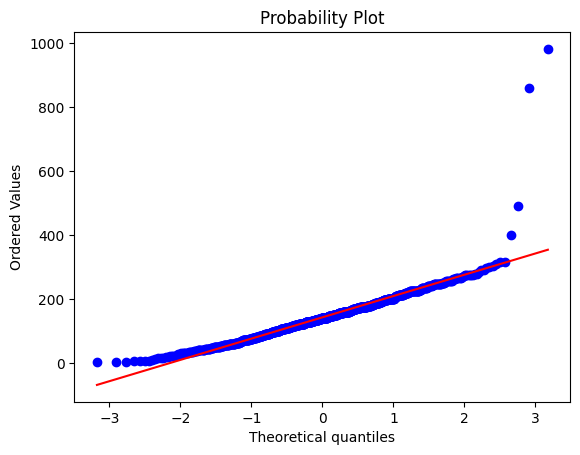

In [49]:
stats.probplot(X['sqrt_Kms_driven'], dist = "norm", plot = pylab)

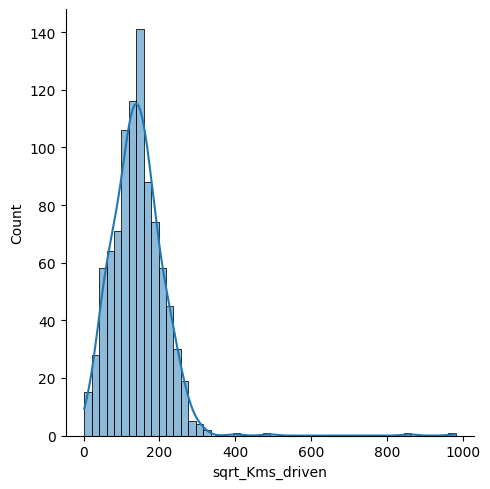

In [50]:
sns.displot(X['sqrt_Kms_driven'],kde=True, bins=50)

In [51]:
from feature_engine.outliers import Winsorizer

In [52]:
#Define the model with IQR method
winsor_iqr = Winsorizer(capping_method = 'iqr', 
                        # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'right', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['sqrt_Kms_driven'])

In [53]:
X["Kms_driven_treated"]=winsor_iqr.fit_transform(X[['sqrt_Kms_driven']])

<AxesSubplot: >

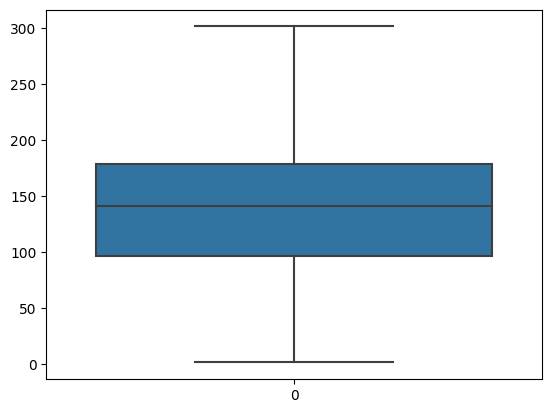

In [54]:
sns.boxplot(X.Kms_driven_treated)

In [55]:
X.head()

,Model,Brand,Kms_driven,Years_used,sqrt_Kms_driven,Kms_driven_treated
0,Honda Activa 5G,Honda,11500.000,4,107.238,107.238
1,Bajaj Dominar 400,Bajaj,21863.000,3,147.861,147.861
2,Royal Enfield Classic 500,Royal Enfield,39000.000,4,197.484,197.484
3,TVS Ntorq 125,TVS,5300.000,2,72.801,72.801
4,Hero Xpulse 200,Hero,400.000,0,20.000,20.000


In [56]:
X.drop(["sqrt_Kms_driven","Kms_driven"],axis=1, inplace=True)

In [57]:
X.head()

,Model,Brand,Years_used,Kms_driven_treated
0,Honda Activa 5G,Honda,4,107.238
1,Bajaj Dominar 400,Bajaj,3,147.861
2,Royal Enfield Classic 500,Royal Enfield,4,197.484
3,TVS Ntorq 125,TVS,2,72.801
4,Hero Xpulse 200,Hero,0,20.000


In [58]:
y.head()

,Log_Price
0,9.616
1,11.951
2,11.970
3,10.358
4,11.813


## Model Building

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [60]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(X[['Model','Brand']])

OneHotEncoder()

In [61]:
from sklearn.compose import make_column_transformer
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Model','Brand']),
                                    remainder='passthrough')

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [63]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [64]:
print(np.argmax(scores))
print(scores[np.argmax(scores)])

421
0.9307859558576026


In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Aprilia SR 150', 'Aprilia SRV 850 ABS', 'Ather Energy Ather 450',
       'Ather Energy Ather 450X', 'BMW F650', 'BMW S 1000 R',
       'Bajaj 4S Champion', 'Bajaj Avenger', 'Bajaj Avenger Cruise 220',
       'Bajaj Avenger Street 150', 'Bajaj Avenger Street 160',
       '...
       'Yamaha SZ R', 'Yamaha SZ RR', 'Yamaha SZ RR V', 'Yamaha Saluto',
       'Yamaha YZF R15', 'Yezdi Classic', 'Yezdi Road King'], dtype=object),
                                                                            array(['Aprilia', 'Ather', 'BMW', 'Bajaj', 'Benelli', 'Harley', 'Hero',
       'Honda', 'Hyosung', 'Indian', 'Jawa', 'KTM', 'Kawasaki', 'LML',
       'Mahindra', 'Royal Enfield', 'Suzuki', 'TVS', 'UM', 'YO Bikes',
       'Yamaha', 'Yezdi'], dtype=ob

In [66]:
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9307859558576026

In [67]:
y_pred_train=pipe.predict(X_train)
r2_score(y_train,y_pred_train)

0.9030246065954122

In [68]:
import pickle

In [69]:
pickle.dump(pipe,open('RegressionModel_bike.pkl','wb'))